In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('data/treasury_bonds.csv')


In [3]:
df

,DATE,DGS6MO,DGS5,DGS10,DGS30
0,1981-12-22,12.88,14.03,14.02,13.65
1,1981-12-23,13.48,14.20,14.14,13.85
2,1981-12-24,13.01,14.03,14.01,13.76
3,1981-12-25,.,.,.,.
4,1981-12-28,13.35,14.01,14.01,13.72
...,...,...,...,...,...
10273,2021-05-07,0.04,0.77,1.60,2.28
10274,2021-05-10,0.04,0.80,1.63,2.32
10275,2021-05-11,0.04,0.80,1.64,2.35
10276,2021-05-12,0.04,0.87,1.69,2.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10278 entries, 0 to 10277
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    10278 non-null  object
 1   DGS6MO  10278 non-null  object
 2   DGS5    10278 non-null  object
 3   DGS10   10278 non-null  object
 4   DGS30   10278 non-null  object
dtypes: object(5)
memory usage: 401.6+ KB


* Date needs to be set to datetime
* Other values should be floats.  I suspect this is because the null values are '.'

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10278 entries, 0 to 10277
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    10278 non-null  datetime64[ns]
 1   DGS6MO  10278 non-null  object        
 2   DGS5    10278 non-null  object        
 3   DGS10   10278 non-null  object        
 4   DGS30   10278 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 401.6+ KB


In [7]:
df.head(20)

,DATE,DGS6MO,DGS5,DGS10,DGS30
0,1981-12-22,12.88,14.03,14.02,13.65
1,1981-12-23,13.48,14.20,14.14,13.85
2,1981-12-24,13.01,14.03,14.01,13.76
3,1981-12-25,.,.,.,.
4,1981-12-28,13.35,14.01,14.01,13.72
5,1981-12-29,13.46,14.11,14.12,13.88
6,1981-12-30,13.29,14.06,14.17,13.86
7,1981-12-31,12.94,13.97,13.98,13.65
8,1982-01-01,.,.,.,.
9,1982-01-04,13.16,14.15,14.19,13.87


* The missing data here is from Christmas and New Years, which makes sense since the market is closed.
* I'll fill in the missing data from the value of the previous day.

In [8]:
df = df.replace('.', np.nan).ffill(axis=0)

In [9]:
df

,DATE,DGS6MO,DGS5,DGS10,DGS30
0,1981-12-22,12.88,14.03,14.02,13.65
1,1981-12-23,13.48,14.20,14.14,13.85
2,1981-12-24,13.01,14.03,14.01,13.76
3,1981-12-25,13.01,14.03,14.01,13.76
4,1981-12-28,13.35,14.01,14.01,13.72
...,...,...,...,...,...
10273,2021-05-07,0.04,0.77,1.60,2.28
10274,2021-05-10,0.04,0.80,1.63,2.32
10275,2021-05-11,0.04,0.80,1.64,2.35
10276,2021-05-12,0.04,0.87,1.69,2.40


In [10]:
df = df.rename(columns={'DATE': 'date',
                        'DGS6MO': '6m',
                        'DGS5': '5y',
                        'DGS10': '10y',
                        'DGS30': '30y'})

In [11]:
df.set_index('date', inplace=True)

In [12]:
df = df['1989':]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   6m      8444 non-null   object
 1   5y      8444 non-null   object
 2   10y     8444 non-null   object
 3   30y     8444 non-null   object
dtypes: object(4)
memory usage: 329.8+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   6m      8444 non-null   object
 1   5y      8444 non-null   object
 2   10y     8444 non-null   object
 3   30y     8444 non-null   object
dtypes: object(4)
memory usage: 329.8+ KB


In [15]:
df[['6m', '5y', '10y', '30y']] = df[['6m', '5y', '10y', '30y']].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6m      8444 non-null   float64
 1   5y      8444 non-null   float64
 2   10y     8444 non-null   float64
 3   30y     8444 non-null   float64
dtypes: float64(4)
memory usage: 329.8 KB


In [17]:
df.describe()

,6m,5y,10y,30y
count,8444.000000,8444.000000,8444.000000,8444.000000
mean,2.970870,3.959298,4.485083,5.017933
std,2.497012,2.322941,2.111447,1.902097
min,0.020000,0.190000,0.520000,0.990000
25%,0.380000,1.790000,2.610000,3.200000
50%,2.490000,3.850000,4.370000,4.930000
75%,5.162500,5.850000,6.060000,6.360000
max,9.690000,9.750000,9.530000,9.310000


In [18]:
df

,6m,5y,10y,30y
date,,,,
1989-01-02,8.67,9.14,9.14,9.00
1989-01-03,8.77,9.25,9.23,9.09
1989-01-04,8.87,9.24,9.22,9.08
1989-01-05,8.97,9.32,9.27,9.10
1989-01-06,8.97,9.30,9.25,9.06
...,...,...,...,...
2021-05-07,0.04,0.77,1.60,2.28
2021-05-10,0.04,0.80,1.63,2.32
2021-05-11,0.04,0.80,1.64,2.35


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

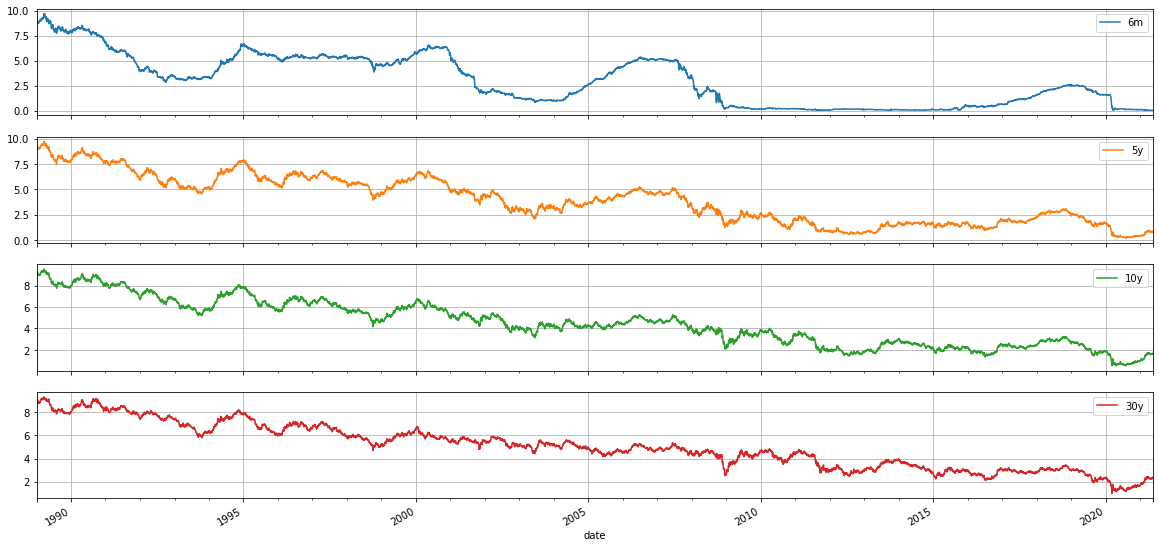

In [19]:
df.plot(subplots=True, grid=True)